Name: Truc Le <br>
ID: 914920690 <br>
Course: STA 141C <br>
Section: AO1 <br>
Teammate: Salem Berekat

In [357]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.linalg import lu
import struct
from itertools import islice
import math 
import time

# 1. Some linear algebra exercises

## 1. Show the following facts about triangular matrices. Note that a unit triangular matrix is a triangular matrix with all diagonal entries being 1.


### a) The product of two upper (lower) triangular matrices is upper (lower) triangular.

Let A, B $\in$ $R^{nxn}$ and are upper triangular matrices. <br>
Let C $\in$ $R^{nxn}$ be the dot product of the two upper triangular matrices, A and B. <br>

The dot product of the two matrices are as follow: <br>
* $c_{i,j} = \sum_{k=1}^{n} a_{ik}b_{kj}$ <br>

For the diagonal of matrix C, when i = j <br>
* $c_{j,j} = \sum_{k=1}^{n} a_{jk}b_{kj}$

* When k > j, then the entries for $b_{kj} = 0$, making the dot product of $a_{jk}b_{kj} = 0$ <br>
* Similarly, when k < j, then the entries for $a_{jk} = 0$, making the dit product of $a_{jk}b_{kj} = 0$ <br>

Therefore, <br>
$c_{j,j} = \sum_{k=1}^{n} a_{jj}b_{jj}$ 

When i > j, either $a_{ij}$ or $b_{kj}$ are 0 entries for all k, resulting in $c_{ij} = 0$. Therefore, the matrix C $\in$ $R^{nxn}$ and an upper triangular matrix.

### b) The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

Let A $\in$ $R^{nxn}$ be an upper triangular matrix. <br>

**Proof**: <br>

We know that:
* $LL^{-1}$ = $I_{nxn}$ <br>

The upper triangular elementary matrices of the $L^{-1}$ with dimension $R^{nxn}$ are invertible: <br>

* $L^{-1}$ = $E_{n}E_{n-1}E_{n-2}...E_{1}$


Therefore: <br>

* $E_{n}E_{n-1}E_{n-2}...E_{1}$A = $I_{nxn}$ <br>

* $E_{n}E_{n-1}E_{n-2}...E_{1}$ = $A^{-1}$

Hence, $A^{-1}$ is also a $R^{nxn}$ upper triangular matrices








### c) The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

Let A, B $\in$ $R^{nxn}$ and are two unit upper triangular matrices. <br>
Let C $\in$ $R^{nxn}$ be the dot product of the two upper triangular matrices, A and B. <br>

The dot product of the two matrices are as follow: <br>
$c_{i,j} = \sum_{k=1}^{n} a_{ik}b_{kj}$ <br>

For the diagonal of matrix C, when i = j <br>
$c_{j,j} = \sum_{k=1}^{n} a_{jk}b_{kj}$

* When k > j, then the entries for $b_{kj} = 0$, making the dot product of $a_{jk}b_{kj} = 0$ <br>
* Similarly, when k < j, then the entries for $a_{jk} = 0$, making the dit product of $a_{jk}b_{kj} = 0$ <br>

<br>
$c_{j,j} = \sum_{k=1}^{n} a_{jj}b_{jj}$ <br>

* for unit matrices triangular matrices
    * $a_{jj} = 1$ and $b_{jj} = 1$, 
* therefore:
    * $c_{j,j} = \sum_{k=1}^{n} a_{jj}b_{jj} = 1$

When i > j, either $a_{ij}$ or $b_{kj}$ are 0 entries for all k, resulting in $c_{ij} = 0$. Therefore, the matrix C $\in$ $R^{nxn}$ and an unit upper triangular matrix.

### d) The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

Let A $\in$ $R^{nxn}$ be an unit upper triangular matrix. <br>

**Proof:** <br>

We know that:
* $LL^{-1}$ = $I_{nxn}$ <br>

The unit upper triangular elementary matrices of the $L^{-1}$ with dimension $R^{nxn}$ are invertible: <br>

* $L^{-1}$ = $E_{n}E_{n-1}E_{n-2}...E_{1}$

Therefore: <br>

* $E_{n}E_{n-1}E_{n-2}...E_{1}$A = $I_{nxn}$ <br>

* $E_{n}E_{n-1}E_{n-2}...E_{1}$ = $A^{-1}$

Hence, $A^{-1}$ is also a $R^{nxn}$ unit upper triangular matrices









### e) An orthogonal upper (lower) triangular matrix is diagonal.

Let A be a square orthogonal matrix, therefore, its properties are:
* A $\in$ $R^{nxn}$
* $A^{-1} = A$
* $A^{-1} = A^{T}$

Since the inverse of an upper triangular matrix must be an upper triangular matrix, the $A^{T}$ is both an upper and lower triangular matrix, it is a lower triangulat matrix because it is a transpose of an upper triangular matrix. This imply that the matrix A is diagonal.

## 2. Show the following:

### a) The Sherman-Morrison formula

$(A + uu^{T})^{-1}$ = $A^{-1}$ - $\frac{A^{-1}uu^{T}A^{-1}}{1 + u^{T}A^{-1}u}$
* A $\in R^{nxn}$ is nonsingular matrix, invertible, and rank-one perturbation
* u $\in R^{n}$

Proving that:
* $(A + uu^{'})$$(A^{-1}$ - $\frac{A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u})$= I

Let XY = $(A + uu^{'})$$(A^{-1}$ - $\frac{A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u})$

* = $AA^{-1}$ + $uu^{'}A^{-1}$ - $\frac{AA^{-1}uu^{'}A^{-1} + uu^{'}A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u}$


* = I + $uu^{'}A^{-1}$ - $\frac{Iuu^{'}A^{-1} + uu^{'}A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u}$


* = I + $uu^{'}A^{-1}$ - $\frac{uu^{'}A^{-1} + uu^{'}A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u}$


* = I + $uu^{'}A^{-1}$ - $\frac{u(1 + u^{'}A^{-1}u)u^{'}A^{-1}}{1 + u^{'}A^{-1}u}$


* = I + $uu^{'}A^{-1}$ - $uu^{'}A^{-1}$


* XY = I


* I = $(A + uu^{'})$$(A^{-1}$ - $\frac{A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u})$


* $(A + uu^{'})^{-1}$ = $A^{-1}$ - $\frac{A^{-1}uu^{'}A^{-1}}{1 + u^{'}A^{-1}u}$

### b) The Woodbury formula

$(A + UV^{'})^{-1}$ = $A^{-1} - A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$

* A $\in R^{nxn}$ is nonsingular matrix, invertible, and rank-one perturbation
* U,V $\in R^{nxm}$
* $I_{m}$ $\in R^{m}$ is an identity matrix


Proving that $(A + UV^{'})$ $(A^{-1} - A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1})$ = I


Let XY = $(A + UV^{'})$ $(A^{-1} - A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1})$


* $= AA^{-1} - AA^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1} + UV^{'}A^{-1} - UV^{'}A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$



* $= (I - U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}) +  (UV^{'}A^{-1} - UV^{'}A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1})$


* = $(I + UVA^{-1}) - (U(I + VA^{-1}U)^{-1}VA^{-1} + UVA^{-1}U(I +VA^{-1}U)^{-1}VA^{-1})$ 


* = $I + UVA^{-1} - (U + UVA^{-1}U)(I + VA^{-1}U)^{-1}VA^{-1}$


* = $I + UVA^{-1} - U(I + VA^{-1}U)(I + VA^{-1}U)^{-1}VA^{-1}$


* = $I + UVA^{-1} - UVA^{-1}$


* = $XY = I$


* $ I = (A + UV^{'})$ $(A^{-1} - A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1})$


* $(A + UV^{'})^{-1}$ = $A^{-1} - A^{-1}U(I_{m} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$


### c) The binomial inversion theorem

$(A + UBV^{'})^{-1} = A^{-1} - A^{-1}U(B^{-1} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$
* A $\in R^{nxn}$ and B $\in R^{mxm}$ are nonsingular matrices,
* $I_{m}$ $\in R^{m}$ is an identity matrix 


Proving that $(A + UBV^{'})(A^{-1} - A^{-1}U(B^{-1} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}) = I$

let $XY = (A + UBV^{'})(A^{-1} - A^{-1}U(B^{-1} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1})$

* = $AA^{-1} - AA^{-1}U(B^{-1} + AV^{'}A^{-1}U)^{-1}V^{'}A^{-1} + UBV^{'}A^{-1} - UBV^{'}A^{-1}U(B^{-1} + UBV^{'}V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$ 


* $= I - IU(B^{-1} + AV^{'}A^{-1}U)^{-1}V^{'}A^{-1} + UBV^{'}A^{-1} - UBV^{'}A^{-1}U(B^{-1} + UBV^{'}V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$ 

* $= I + UBV^{'}A^{-1} - U(B^{-1} + AV^{'}A^{-1}U)^{-1}V^{'}A^{-1} - UBV^{'}A^{-1}U(B^{-1} + UBV^{'}V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$ 


* $= I + UBV^{'}A^{-1} - U(B + BV^{'}A^{-1}UB(B + BV^{'}A^{-1}UB)^{-1}BV^{'}A^{-1}$


* $= I + UBV^{'}A^{-1} - UBV^{'}A^{-1}$


* $XY = I$


* $I = (A + UBV^{'})(A^{-1} - A^{-1}U(B^{-1} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1})$


* $(A + UBV^{'})^{-1} = A^{-1} - A^{-1}U(B^{-1} + V^{'}A^{-1}U)^{-1}V^{'}A^{-1}$



When $A = I_{n}$ and $B = I_{m}$:

* $(I - UV^{'})^{-1} = I - U(I + V^{'}U)^{-1}V^{'}$
* Drastically simplifying the equations since there are less variables to worry about within the calculation 


When m = 1, then:
* let u and v be vectors from their respective matrices U and V.
* $(I - uv)^{-1} = I - \frac{uv}{(1 + uv)}$
* In the case of m=1, we only need to use the vectors u and v to solve the matric inverses, rather than having to use the entirety of the matrices U and V. 

## 3. Show the matrix determinant lemma

$det(A + UV^{'}) = det(A)det(I_{m} + V^{'}A^{-1}U)$
* A $\in R^{nxn}$
* U,V $\in R^{nxm}$


$A + uv^{'} = A(I + A^{-1}uv^{'})$<br>
$det(A + uv^{'}) = det(A(I_{m} + v^{'}A^{-1}u))$
* = $det(A)det(I_{m} + v^{'}A^{-1}u)$
    * $det(I_{m} + v^{'}A^{-1}u)$ 
    * let $A = I_{m}$
    * $det(I_{m} + v^{'}u)$ 
    $ = $
    $$\begin{bmatrix} I & 0 \\ v^{'} & 1 \end{bmatrix}             
    \begin{bmatrix} I + uv^{'} & u \\ 0 & 1 \end{bmatrix}
    \begin{bmatrix} I & 0 \\ v^{'} & 1 \end{bmatrix}
    = 
    \begin{bmatrix} I & 0 \\ 0 & 1 + v^{'}u \end{bmatrix}$$
* = $(1 + v^{'}A^{-1}u)$

Hence,
* $det(A + uv^{'}) = det(A)(1 + v^{'}A^{-1}u)$


# 2 Programming exercises

### 4. Let a=0.7, b=0.2, and c=0.1


In [358]:
# Initializing the variable with its appropiate int values
a = 0.7
b = 0.2
c = 0.1

1. (a + b) + c = 1

In [359]:
(a + b) + c

0.9999999999999999

2. a + (b + c)

In [360]:
a + (b + c)

1.0

3. (a + c) + b

In [361]:
(a + c) + b

1.0

* Explain what you found.

Only a + (b + c) and (a + c) + b equals to 1.0 while (a + b) + c is a continous 0.9999999 decimal. 

The result for problem (a) comes out to be 0.9999 rather than 1.0 is due to the internal representation of 0.1 in bits. Due to the fact that the binary of 0.1 goes to the 1369 place when python can only store up to 64-bits, means that the floating-point approximation will be less than 0.1. The binary eqivalent of 0.1 will be close to 0.1 but never reach the value due to the lack of binary storage space. Therefore, when we add 0.1 alone to a larger floating point value, the resulting value would always be less than the actual value. 



### 5. Create the vector v = (969, 971, 972, . . . , 1022, 1023), which has 54 elements

In [362]:
# A function that takes three arguments: min, max, and step, to create a customized vector
def vector(mini, maxi, step):
    v = []
    i = mini
    while i <= maxi:
        v.append(i)
        i += step
    return v

# a summation function that takes two arguments: the starting index and the vector function
def sum(i,vector):
    num = 0 
    for v in vector[i:]:
        num = num + (2**v)
    return num
            

* \begin{equation}
\sum_{i=1}^{54} 2^{v_{i}}
\end{equation}

In [363]:
print(sum(0, vector(969, 1023, 1)))

179769313486231585783329745242102944220865915302134242104801930069088822049132857039678747649997371558725200148282140634302672658333178512561752459655489972529838397712786934476288037223531902825608779341177537812204758820982652898146886972738651264941212339564475904472144978749089612198939118253764199317504


* \begin{equation}
\sum_{i=2}^{54} 2^{v_{i}}
\end{equation}

In [364]:
print(sum(1, vector(969, 1023, 1)))

179769313486231580793728971405303415079934132710037826936173778980444968292764750946649017977587207096330286416692887910946555547851940402630657488671505820681908902000708383676273854845817711531764475730270069855571366959622842914819860834936475292719074168444365510704342711559699508093042880177904174497792


* \begin{equation}
2^{v_{1}} + \sum_{i=2}^{54} 2^{v_{i}}
\end{equation}

In [365]:
print((2**969) + sum(1, vector(969, 1023, 1)))

179769313486231585783329745242102944220865915302134242104801930069088822049132857039678747649997371558725200148282140634302672658333178512561752459655489972529838397712786934476288037223531902825608779341177537812204758820982652898146886972738651264941212339564475904472144978749089612198939118253764199317504


Explain what you found.

The value for problem a and c are the same, while the value for problem b is a close approximation to the value of a.

### 6. Create the vector x = (0.988, 0.989, 0.990, · · · 1.010; 1.011; 1.012).

* Plot the polynomial $y=x^7 − 7x^6 + 21x^5 − 35x^4 + 35x^3 − 21x^2 + 7x−1$ at each point in x



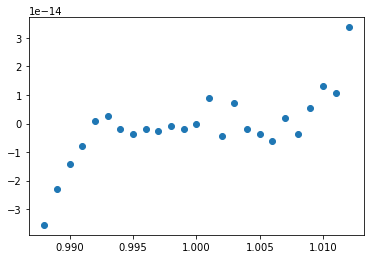

In [386]:
# this function creates the first polynomial and takes the vector function as its argument
def poly(x):
    y = []
    for i in x:
        y_data = (
            (i**7)
                  - 7*(i**6)
                  + 21*(i**5)
                  - 35*(i**4)
                  + 35*(i**3)
                  - 21*(i**2)
                  + 7*i
                  - 1)
        y.append(y_data)
    return(y)

# initializing the variables to plot the scatterplot, using y data point taking from the poly function  
x = vector(0.988, 1.012, 0.0010)
y = poly(vector(0.988, 1.012, 0.0010))
plt.scatter(x, y)
plt.show()

* Plot the polynomial $y = (x − 1)^7$ at each point in x

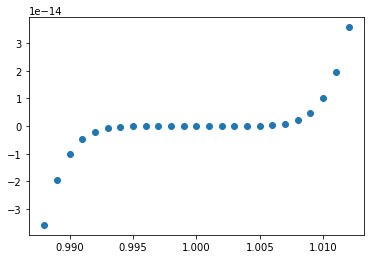

In [367]:
# this function creates the second polynomial and takes the vector function as its argument
def poly2(x):
    y = []
    for i in x:
        y_data = ((i - 1)**7)
        y.append(y_data)
    return(y)

# initializing the variables to plot the scatterplot, using y data point taking from the poly2 function   
y2 = poly2(vector(0.988, 1.012, 0.0010))
plt.scatter(x, y2)
plt.show()

* Explain what you found.

The polynomial $y=x^7 − 7x^6 + 21x^5 − 35x^4 + 35x^3 − 21x^2 + 7x−1$ is a close estimation of the polynomial $y = (x − 1)^7.$  The shape of the first equation is dictated by the largest exponent in the polynomia which is degree 7, the variation of the points from the dominant shape is due to the following exponents within the equation. In the case of the second equation, the polynomial only have one exponent in the equation, which is degree 7, therefore the shape is more distinct and neat.


### 7. Basic exercises using numpy or R: let u = (1, 2, 3, 3, 2, 1)′

In [368]:
# creating the a vector that has 6 rows
u = np.array([[1, 2, 3, 3, 2, 1]]).T
u

array([[1],
       [2],
       [3],
       [3],
       [2],
       [1]])

(a) Compute $U = I − \frac{2}{u^{'}u}uu′$ (This type of matrix is known as an ‘elementary reflector’ or a ‘Householder transformation.’)

In [369]:
# creating a 6x6 identity matrix using numpy
I = np.identity(6)
# solving for the elementary reflector matrix 
U = I - ((2 / u.T.dot(u)) * u.dot(u.T))
print(U)


[[ 0.92857143 -0.14285714 -0.21428571 -0.21428571 -0.14285714 -0.07142857]
 [-0.14285714  0.71428571 -0.42857143 -0.42857143 -0.28571429 -0.14285714]
 [-0.21428571 -0.42857143  0.35714286 -0.64285714 -0.42857143 -0.21428571]
 [-0.21428571 -0.42857143 -0.64285714  0.35714286 -0.42857143 -0.21428571]
 [-0.14285714 -0.28571429 -0.42857143 -0.42857143  0.71428571 -0.14285714]
 [-0.07142857 -0.14285714 -0.21428571 -0.21428571 -0.14285714  0.92857143]]


(b) Let C = UU (matrix-matrix multiplication), the matrix product of U and itself. Find the largest and smallest off-diagonal elements of C.

In [370]:
C = U @ U
C2 = C.copy()

#function to mask the diagonal based on what we are trying to find 
def mask(C2, mask):
    np.fill_diagonal(C2, mask)
    return C2

print(C2)

print("The maximum value for non-diagonal element is:{i} ".format(i= mask(C2, -1).max()))
print("The minimum value for non-diagonal element is:{i} ".format(i=mask(C2, 0).min()))


[[ 1.00000000e+00 -2.46401539e-17 -5.55111512e-17 -4.38991247e-17
  -2.77555756e-17 -1.92589708e-17]
 [-2.46401539e-17  1.00000000e+00 -7.59030027e-17 -1.11022302e-16
  -4.48195902e-17 -2.77555756e-17]
 [-5.55111512e-17 -7.59030027e-17  1.00000000e+00 -7.22211406e-17
  -1.11022302e-16 -4.48903953e-17]
 [-4.38991247e-17 -1.11022302e-16 -7.22211406e-17  1.00000000e+00
  -8.97807905e-17 -8.32667268e-17]
 [-2.08166817e-17 -5.55111512e-17 -9.71445147e-17 -5.55111512e-17
   1.00000000e+00 -4.16333634e-17]
 [-1.38777878e-17 -2.77555756e-17 -5.55111512e-17 -8.32667268e-17
  -4.16333634e-17  1.00000000e+00]]
The maximum value for non-diagonal element is:-1.3877787807814457e-17 
The minimum value for non-diagonal element is:-1.1102230246251565e-16 


(c) Find the largest and smallest diagonal elements of C

In [371]:
print("The maximum value for diagonal element is:{i} ".format(i= np.diagonal(C).max()))
print("The minimum value for diagonal element is:{i} ".format(i= np.diagonal(C).min()))

The maximum value for diagonal element is:1.0 
The minimum value for diagonal element is:0.9999999999999998 


(d) Compute Uu. (matrix-vector multiplication)

In [372]:
U2 = U.dot(u)
print(U2)

[[-1.]
 [-2.]
 [-3.]
 [-3.]
 [-2.]
 [-1.]]


(e) Compute the scalar $max_{i} \ \sum_{j} |U_{ij}|$

In [373]:
# function convert all entries in each row into absolute value and sum each row
# save the sum value into a list and return the largest value in the list
def infnorm (U):
    rmax = []
    for p in U:
        rmax.append(np.absolute(p).sum())
    return print(max(rmax))

infnorm(U)


2.2857142857142856


(f) Print the third row of U.

In [374]:
# Third row of U
U_2 = U[2]
print(U_2)

[-0.21428571 -0.42857143  0.35714286 -0.64285714 -0.42857143 -0.21428571]


(g) Print the elements of the second column below the diagonal.


In [375]:
U2_1 = U[2:,1]
print(U2_1)

[-0.42857143 -0.42857143 -0.28571429 -0.14285714]


(h) Let A be the first three columns of U. Compute P = AA′.


In [376]:
# getting the first three columns of the matrix U
A = U[:,:3]
print(A)

# creating the P matrix
P = A @ A.T
print(P)

[[ 0.92857143 -0.14285714 -0.21428571]
 [-0.14285714  0.71428571 -0.42857143]
 [-0.21428571 -0.42857143  0.35714286]
 [-0.21428571 -0.42857143 -0.64285714]
 [-0.14285714 -0.28571429 -0.42857143]
 [-0.07142857 -0.14285714 -0.21428571]]
[[ 9.28571429e-01 -1.42857143e-01 -2.14285714e-01 -3.54025199e-17
  -2.88884563e-17 -1.44442281e-17]
 [-1.42857143e-01  7.14285714e-01 -4.28571429e-01 -1.52938886e-17
  -2.26576127e-18 -1.13288064e-18]
 [-2.14285714e-01 -4.28571429e-01  3.57142857e-01 -4.07837029e-17
  -4.30494642e-17 -2.15247321e-17]
 [-3.54025199e-17 -1.52938886e-17 -4.07837029e-17  6.42857143e-01
   4.28571429e-01  2.14285714e-01]
 [-2.88884563e-17 -2.26576127e-18 -4.30494642e-17  4.28571429e-01
   2.85714286e-01  1.42857143e-01]
 [-1.44442281e-17 -1.13288064e-18 -2.15247321e-17  2.14285714e-01
   1.42857143e-01  7.14285714e-02]]


(i) Show that P is idempotent by recomputing (e) with P P − P  

In [377]:
x = P @ P - P
print(x)
infnorm(x)

[[ 1.11022302e-16 -2.77555756e-17  0.00000000e+00 -2.47817639e-17
  -1.38777878e-17 -6.93889390e-18]
 [-2.77555756e-17  0.00000000e+00 -5.55111512e-17  1.58603289e-17
   1.58603289e-17  7.93016446e-18]
 [ 0.00000000e+00 -5.55111512e-17 -5.55111512e-17 -8.92143502e-18
   1.98254112e-18  9.91270558e-19]
 [-2.47817639e-17  1.58603289e-17 -8.92143502e-18 -1.11022302e-16
  -5.55111512e-17 -2.77555756e-17]
 [-1.38777878e-17  1.58603289e-17  1.98254112e-18 -5.55111512e-17
  -5.55111512e-17 -2.77555756e-17]
 [-6.93889390e-18  7.93016446e-18  9.91270558e-19 -2.77555756e-17
  -2.77555756e-17 -1.38777878e-17]]
2.43852557194454e-16


P is idempotent since the infinity norm of PP-P is equal to $2.43852557194454^{-16}$, which is close to 0. For a matrix P to be idempotent, its $P^{2}$ needs to be equal or exceedingly close to P which our infinity norm calculation show in this case.

(j) Let B be the last three columns of U. Compute Q = BB′

In [378]:
# getting the last three columns of the matrix U
B = U[:,3:]
print(B)

# creating the Q matrix
Q = B @ B.T
print(Q)

[[-0.21428571 -0.14285714 -0.07142857]
 [-0.42857143 -0.28571429 -0.14285714]
 [-0.64285714 -0.42857143 -0.21428571]
 [ 0.35714286 -0.42857143 -0.21428571]
 [-0.42857143  0.71428571 -0.14285714]
 [-0.21428571 -0.14285714  0.92857143]]
[[ 7.14285714e-02  1.42857143e-01  2.14285714e-01 -2.38967009e-17
  -7.25751658e-18 -8.21338462e-18]
 [ 1.42857143e-01  2.85714286e-01  4.28571429e-01 -4.77934019e-17
  -1.45150332e-17 -1.64267692e-17]
 [ 2.14285714e-01  4.28571429e-01  6.42857143e-01 -2.83220159e-17
  -2.00378263e-17 -2.46401539e-17]
 [-2.38967009e-17 -4.77934019e-17 -2.83220159e-17  3.57142857e-01
  -4.28571429e-01 -2.14285714e-01]
 [-7.25751658e-18 -1.45150332e-17 -2.00378263e-17 -4.28571429e-01
   7.14285714e-01 -1.42857143e-01]
 [-8.21338462e-18 -1.64267692e-17 -2.46401539e-17 -2.14285714e-01
  -1.42857143e-01  9.28571429e-01]]


(k) Show that Q is idempotent by recomputing (e) with QQ − Q

In [379]:
x2 = Q @ Q - Q
infnorm(x2)

3.039660360150381e-16


Q is idempotent since the infinity norm of QQ-Q is equal to $3.039660360150381^{-16}$, which is close to 0. For a matrix Q to be idempotent, its $Q^{2}$ needs to be equal or exceedingly close to P which our infinity norm calculation show.

(l) Compute P + Q

In [380]:
# adding the two matrices togther
print(P+Q)

[[ 1.00000000e+00 -2.77555756e-17 -5.55111512e-17 -5.92992209e-17
  -3.61459728e-17 -2.26576127e-17]
 [-2.77555756e-17  1.00000000e+00 -5.55111512e-17 -6.30872905e-17
  -1.67807944e-17 -1.75596499e-17]
 [-5.55111512e-17 -5.55111512e-17  1.00000000e+00 -6.91057189e-17
  -6.30872905e-17 -4.61648860e-17]
 [-5.92992209e-17 -6.30872905e-17 -6.91057189e-17  1.00000000e+00
  -1.11022302e-16 -5.55111512e-17]
 [-3.61459728e-17 -1.67807944e-17 -6.30872905e-17 -1.11022302e-16
   1.00000000e+00  0.00000000e+00]
 [-2.26576127e-17 -1.75596499e-17 -4.61648860e-17 -5.55111512e-17
   0.00000000e+00  1.00000000e+00]]


Adding both matrices P and Q together return a symmetric matrix with the diagonal elements equal to 1.

### 8. Read in the matrix in the file ‘oringp.dat’ on the failure of O-rings leading to the Challenger disaster. The columns are flight number, date, number of O-rings, number failed, and temperature at launch. Compute the correlation between number of failures and temperature at launch, deleting the last, missing observation (the disaster).

In [381]:
# read the .dat file
with open('/Users/trucle/Desktop/oringp.dat', "r") as f:
    data = f.read().splitlines()

# split the strings into multiple pieces at every whitespace and save into a nested list  
l = []
i = 0
while i in range(len(data)):
    c = data[i].split()
    #print(c)
    l.append(data[i].split())
    i += 1


# convert the nested list into a dataframe
# delete the row that have the missing observation and keep the new modificed dataframe
# convert the datatype of columns Failed and Temp from object to int
df = pd.DataFrame(l, columns = ['Flight', 'Date', 'O-rings', 'Failed', 'Temp'])
df.drop([23], inplace= True)
df[["Failed", "Temp"]] = df[["Failed", "Temp"]].apply(pd.to_numeric)

#calculate the correlation between numbers of failures and the temperature at launch
df['Failed'].corr(df['Temp'])


-0.5613284258418356

According to the correlation coefficient calculated between the numbers of failures and the temperature at launch, it is observed that the lower the temperature the more likely the launch will experience failures.

### 9. Write a function named solve power(A,k,b) to solve the linear equation $A^{k}x = b$, where $A ∈ R^{n×n}$ is nonsingular and $b ∈ R^{n}$

In [382]:
# creating a n by n non-singular matrix using numpy
# seed() allow for the matrix generated by the random function to consistently appear
def square_matrix(size):
    np.random.seed(2)
    A = np.random.random((size, size))
    return A

A = square_matrix(10)

#Creating a n x 1 vector using numpy
def b_vector(size):
    np.random.seed(3)
    b = np.random.random((size, 1))
    return b

b = b_vector(10)

def solve_power(A,k,b):
    # raising the matrix A to the power of k
    Ak = np.power(A, k)
    # get the lu decomposition of the square matrix A
    p, l, u = lu(Ak)


    # The following 4 lines of code was taken from:[LU Factorization]
    # see Bibliography at the bottom for more detail

    # ***Codes from website starts
    # initializing empty array to append the solution to iteratively
    x =  np.zeros([len(b),1],dtype=float)


    # forward substitution 
    x[0] = float(b[0] / l[0][0])
    for i in range(1,len(b)):
        x[i] = (b[i] - l[i,:i].dot(x[:i]))/l[i,i]

    # ***code from website ends***
    return x

print(solve_power(A,4,b))



[[ 0.5507979 ]
 [ 0.44716483]
 [ 0.28782521]
 [ 0.52488685]
 [ 0.8203466 ]
 [ 0.47526627]
 [-0.06177859]
 [-0.01590498]
 [-0.11343746]
 [ 0.34519965]]


**Reference:** [LU factorization](https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html#Solving-equations-after-$\mathbf{LU}$-factorization) 

## 10. Consider the mixed effect model

### a)

 y ~ N($\mu, \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n}$ )
 
 * The mean of the effect model y is $\mu$ because the predicted samples of this model, $x^{'}_{i}\beta$, is equal to $\mu_{i}$.
 
 * The variance of the effect model is equal to $\sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n}$ is because:
 
     * The variance of $z^{'}_{i}\gamma$ = $(z')'\sigma_{1}^{2}(z')I_{q}$ = $ZZ''\sigma_{1}^{2}$
     
     * The varuance of $\epsilon_{i}$ = $\sigma_{0}^{2}I_{n}$
     
     * when we add the variance of both $z^{'}_{i}\gamma$ and $epsilon_{i}$ we get $\sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n}$ as the variance for the mixed effect model
     

y ~ N($\mu, \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n}$ ) :


Density function of the multivariate normal distribution:
$f_{x}(x_{1},...,x_{k})$ = $(2\pi)^{-\frac{n}{2}}det(\Sigma)^{-\frac{1}{2}}e^{-\frac{1}{2}(x-\mu)^{'}\Sigma^{-1}(x-\mu)}$


Plug everything into the multivariate normal density function:

$f_{y}$ = $(2\pi)^{-\frac{n}{2}}det( \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n})^{-\frac{1}{2}}e^{-\frac{1}{2}(y-\mu)^{'}( \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n})^{-1}(y-\mu)}$


Take the log of the density function:

$log(f_{y})$ = $log((2\pi)^{-\frac{n}{2}}det( \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n})^{-\frac{1}{2}}e^{-\frac{1}{2}(y-\mu)^{'}( \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n})^{-1}(y-\mu)})$

$= -\frac{n}{2}log(2\pi) - \frac{1}{2}log(det( \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n})) - \frac{1}{2}(y-\mu)^{'}( \sigma_{1}^{2}ZZ^{'} + \sigma_{0}^{2}I_{n})^{-1}(y-\mu)$



### b)


In [383]:
# Generating random matrices and vectors
np.random.seed(40)
epi = np.random.rand(50,1)
simga0 = (np.var(epi, ddof=1))
np.random.seed(40)
gamma = np.random.rand(5,1)

# Generating fixed matrices and vectors
np.random.seed(45)
Z = np.random.rand(50,5)
np.random.seed(46)
beta = np.random.rand(50,1)
np.random.seed(47)
x = np.random.rand(50,50)
mu = x.T.dot(beta)
simga1 = (np.var(Z.dot(gamma), ddof=1)) 
y = x.T.dot(beta) + Z.dot(gamma) + epi


In [385]:
# This is a nested function that contains the woodbury function and the matrix determinant lemma function
# this will return the log-likelihood function 
def dmvnorm_lowrank(y, mu, Z, sigma0, sigma1, log = False):
    n = Z.shape[0]
    
    # This is a function that uses the woodbury formula to calculate the inverse of the perturbed matrix UV'.
    # n, q are the dimmension of matrix Z
    def woodbury(sigma0, sigma1, Z):
        n = Z.shape[0]
        q = Z.shape[1]
        A = sigma0 * np.identity(n)
        U = sigma1 * Z
        VT = np.transpose(Z)
        wb = (
            np.linalg.inv(A)
              - np.linalg.inv(A) @ U @ np.linalg.inv(np.identity(q) 
                + VT @ np.linalg.inv(A) @ U) @ VT @ np.linalg.inv(A)
        ) 
        return wb

    # This function calculate the matrix determinant lemma  
    def det_lemma(sigma0, sigma1, Z):
        n = Z.shape[0]
        A = sigma0 * np.identity(n)
        U = sigma1 * Z
        VT = np.transpose(Z)
        det_lm = (
            np.linalg.det(A) 
            * (1 + VT @ (np.linalg.inv(A) @ U) )
        )
        return det_lm
    

    # if the log is equal to False, return the log-likelihood function
    # else, return the exponent of the likelihood function
    if log == False:
        x = (
            ((-n/2) * np.log(2 * math.pi))
         - ((1/2) * np.log(det_lemma(sigma0, sigma1, Z)))
         - ((1/2) * (np.transpose((y-mu)).dot(woodbury(sigma0, sigma1, Z))).dot((y-mu)))
        )
        return x
    else:
        y = np.exp(x)
    
start_time = time.time()
print(dmvnorm_lowrank(y, mu, Z, sigma0, sigma1, log = False))
time_elapsed = (time.time() - start_time)
print("The time it took to run the code was {}".format(time_elapsed))

[[-35.93285469 -35.70706175 -35.7555827  -35.71051066 -35.75393262]
 [-35.70706175 -35.71653585 -35.62628709 -35.61263073 -35.64804585]
 [-35.7555827  -35.62628709 -35.77033016 -35.65788801 -35.6979875 ]
 [-35.71051066 -35.61263073 -35.65788801 -35.72693303 -35.69440751]
 [-35.75393262 -35.64804585 -35.6979875  -35.69440751 -35.81937341]]
The time it took to run the code was 0.005095958709716797


11 .  In class we learnt about the BLAS and how it has become a de facto standard for basic linear algebra operations. Both R and numpy use the BLAS and LAPACK libraries extensively to accelerate certain types of operations. Apart from *, %*%, eigen, and qr, find out what other common functions use the BLAS and LAPACK routines to speed up calculations?

Other common function that use the BLAS and LAPACK routines are:
* multi_dot function that compute the dot products for multiple arrays in a single function call and select for the fastest evaluation order

* eigh function compute and return the eigenvalues and vectors of a complex Hermitian or a real symmetric matrix.

* matrix_rank function that uses svd to compute the rank of the matri

* lstsq function compute and return the least square solution vector to a linear matrix problem 

All of these functions are some of the functions in numpy that use BLAS and LAPACK to speed up linear algebra calculations

**Reference:** Read [Numpy Documentation](https://numpy.org/doc/stable/reference/routines.linalg.html#the-operator) 

# References

1.    Title: LU factorization
    * Author: John T. Foster
    *    Date: 01/24/2022
    *    Type: source code    
    *    Code version: 1.0 
    *    Availability: <https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html#Solving-equations-after-$\mathbf{LU}$-factorization>


2.    Title: Linear algebra (numpy.linalg)
    *    Author: NumPy Developers
    *    Date: 01/24/2022
    *    Type: API Reference    
    *    Code version: 4.2.0 
    *    Availability: <https://numpy.org/doc/stable/reference/routines.linalg.html#the-operator>




